In [1]:
from statistics import mean
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random


In [2]:
style.use('fivethirtyeight')


In [3]:
def create_data_set(n, variance, step=2, correlation=False):
    val = 1
    Y = []
    X = []
    for i in range(n):
        y = val + random.randrange(-variance, variance)
        Y.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
        X.append(i)
    # X = [i for i in range(len(Y))]
    return np.array(X, dtype=np.float64), np.array(Y, dtype=np.float64)



In [4]:
def get_slop_and_intercept(X, Y):
    m = (mean(X) * mean(Y) - mean(X * Y)) / (mean(X) * mean(X) - mean(X * X))
    b = mean(Y) - m * mean(X)
    return m, b



In [5]:
def get_mse(Y, Y_predicted):
    n = len(Y)
    Y1 = Y_predicted - Y
    Y2 = Y1 * Y1
    s = sum(Y2)
    mse = 1 / float(n) * s
    return mse


MSE: 77.04456144465293
RMSE: 8.777503144098151


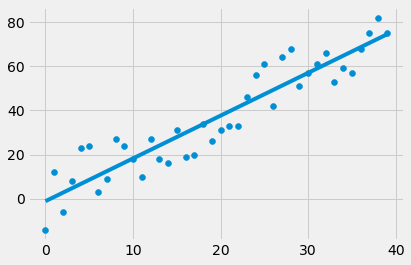

In [6]:
X, Y = create_data_set(40, 15, correlation='pos')

m, b = get_slop_and_intercept(X, Y)

regression_line = [m * x + b for x in X]

mse = get_mse(Y, regression_line)

print('MSE: %s' % mse)
print ('RMSE: %s' % math.sqrt(mse))

plt.scatter(X, Y)
plt.plot(X, regression_line)
plt.show()
